# Base de Dados de Crédito

Criar modelo capaz de reconhecer potenciais bons e maus pagadores de crédito

In [3]:
# =====   Importação das Bibliotecas   ===== #
from pandas import read_csv, DataFrame, Series
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix

from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

import warnings
warnings.filterwarnings('ignore')

In [12]:
def avalia_modelo(nome, classificador, prev_test, clas_test, verbose=False):
    previsoes = classificador.predict(prev_test)
    
    score = accuracy_score(clas_test, previsoes)
    matriz = confusion_matrix(clas_test, previsoes)
    
    if verbose is True:
        print("{}: {}".format(nome, score))
    
    return score, matriz

def split_train_test_data(seed):
    dados_train_test = train_test_split(previsores, classe, test_size=0.25, random_state=seed)
    prev_train = dados_train_test[0]
    prev_test = dados_train_test[1]
    clas_train = dados_train_test[2]
    clas_test = dados_train_test[3]
    
    return prev_train, prev_test, clas_train, clas_test

def avalia_RandomForest(list_n_tree, n_seeds):
    score_medio_total = {}
    for tree in list_n_tree:
        score_medio = []
        
        for seed in range(n_seeds):
            prev_train, prev_test, clas_train, clas_test = split_train_test_data(seed)
        
            modeloForest = RandomForestClassifier(n_estimators=tree, random_state=1)
            modeloForest.fit(prev_train, clas_train)
            scoreForest, _ = avalia_modelo("Random Forest", modeloForest, prev_test, clas_test)
            
            score_medio.append(scoreForest)
        
        score_medio = np.array(score_medio)
        score_medio_total[tree] = score_medio.mean()
    
    return score_medio_total
        
def avalia_KNN(list_n_neighbors, n_seeds):
    score_medio_total = {}
    for n_neighbor in list_n_neighbors:
        score_medio = []
        
        for seed in range(n_seeds):
            prev_train, prev_test, clas_train, clas_test = split_train_test_data(seed)
            
            modeloKNN = KNeighborsClassifier(n_neighbors=n_neighbor, metric='minkowski', p=2)
            modeloKNN.fit(prev_train, clas_train)
            scoreKNN, _ = avalia_modelo("KNN", modeloKNN, prev_test, clas_test)
            
            score_medio.append(scoreKNN)
        
        score_medio = np.array(score_medio)
        score_medio_total[n_neighbor] = score_medio.mean()
    
    return score_medio_total

In [6]:
base = read_csv('Credito.csv', sep=';', encoding='latin1')

previsores = base.iloc[:, :19].values
classe = base.iloc[:, 19].values


# Pre processamento dos dados
from sklearn.preprocessing import LabelEncoder, StandardScaler
encoder = LabelEncoder()
colunas = [0, 2, 3, 5, 6, 8, 9, 11, 13, 14, 16, 18]
for col in colunas:
    previsores[:, col] = encoder.fit_transform(previsores[:, col])

classe = encoder.fit_transform(classe)

scaler = StandardScaler()
previsores = scaler.fit_transform(previsores)

### Analise Inicial de diferentes classificadores

In [5]:
# Analise Inicial
att_prev_train, att_prev_test, att_clas_train, att_clas_test = split_train_test_data(0)

modeloNB = GaussianNB()
modeloNB.fit(att_prev_train, att_clas_train)
scoreNB, _ = avalia_modelo("Naive Bayes", modeloNB, att_prev_test, att_clas_test, verbose=True)

modeloTree = DecisionTreeClassifier(criterion='entropy', random_state=1)
modeloTree.fit(att_prev_train, att_clas_train)
scoreTree, _ = avalia_modelo("Decision Tree", modeloTree, att_prev_test, att_clas_test, verbose=True)

modeloForest = RandomForestClassifier(n_estimators=12, random_state=1)
modeloForest.fit(att_prev_train, att_clas_train)
scoreForest, _ = avalia_modelo("Random Forest", modeloForest, att_prev_test, att_clas_test, verbose=True)

modeloKNN = KNeighborsClassifier(n_neighbors=9, metric='minkowski', p=2)
modeloKNN.fit(att_prev_train, att_clas_train)
scoreKNN, _ = avalia_modelo("KNN", modeloKNN, att_prev_test, att_clas_test, verbose=True)

modeloSVM = SVC(kernel='rbf', C=2.0)
modeloSVM.fit(att_prev_train, att_clas_train)
scoreSVM, _ = avalia_modelo("SVM", modeloSVM, att_prev_test, att_clas_test, verbose=True)

modeloRNA = MLPClassifier(hidden_layer_sizes=(100), learning_rate_init=0.1, tol =0.000001, random_state=0)
modeloRNA.fit(att_prev_train, att_clas_train)
scoreRNA, _ = avalia_modelo("RNA", modeloRNA, att_prev_test, att_clas_test, verbose=True)


Naive Bayes: 0.672
Decision Tree: 0.672
Random Forest: 0.768
KNN: 0.744
SVM: 0.76
RNA: 0.74


Naive Bayes e Decision Tree mostraram resultados menos interessantes

### Busca por melhoria nos parametros de RandomForest e KNN

In [6]:
# Busca por melhora nos parametros de RandomForest e KNN
scoresForest = avalia_RandomForest(list_n_tree=list(range(50,106, 5)), n_seeds=20)
max(scoresForest.values())
for key, val in scoresForest.items():
    if val == max(scoresForest.values()):
        print("Melhor n_tree =", key)

scoresKNN = avalia_KNN(list_n_neighbors=list(range(2,15)), n_seeds=20)
for key, val in scoresKNN.items():
    if val == max(scoresKNN.values()):
        print("Melhor n_neighbor =", key)

Melhor n_tree = 85
Melhor n_neighbor = 8


### Visualização das matrizes de confusão

In [49]:
# Novos modelos
modeloForest = RandomForestClassifier(n_estimators=85, random_state=1)
modeloForest.fit(att_prev_train, att_clas_train)
scoreForest, matrizForest = avalia_modelo("Random Forest", modeloForest, att_prev_test, att_clas_test)

modeloKNN = KNeighborsClassifier(n_neighbors=8, metric='minkowski', p=2)
modeloKNN.fit(att_prev_train, att_clas_train)
scoreKNN, matrizKNN = avalia_modelo("KNN", modeloKNN, att_prev_test, att_clas_test)

modeloSVM = SVC(kernel='rbf', C=2.0)
modeloSVM.fit(att_prev_train, att_clas_train)
scoreSVM, matrizSVM = avalia_modelo("SVM", modeloSVM, att_prev_test, att_clas_test)

modeloRNA = MLPClassifier(hidden_layer_sizes=(100), learning_rate_init=0.1, tol =0.000001, random_state=0)
modeloRNA.fit(att_prev_train, att_clas_train)
scoreRNA, matrizRNA = avalia_modelo("RNA", modeloRNA, att_prev_test, att_clas_test)

In [54]:
print('RandomForest: \n', matrizForest, '\n')
print('KNN: \n', matrizKNN, '\n')
print('SVM: \n', matrizSVM, '\n')
print('RNA: \n', matrizRNA)

RandomForest: 
 [[158  18]
 [ 41  33]] 

KNN: 
 [[164  12]
 [ 55  19]] 

SVM: 
 [[162  14]
 [ 46  28]] 

RNA: 
 [[149  27]
 [ 38  36]]


### Comparação dos 4 classificadores escolhidos

In [11]:
# Criação e Teste dos classificadores escolhidos
def create_test_model(classificador, index_train, index_test):
    if classificador == 'forest':
        modelo = RandomForestClassifier(n_estimators=85, random_state=1)
    
    elif classificador == 'knn':
        modelo = KNeighborsClassifier(n_neighbors=8, metric='minkowski', p=2)
    
    elif classificador == 'svm':
        modelo = SVC(kernel='rbf', C=2.0)
    
    elif classificador == 'rna':
        modelo = MLPClassifier(hidden_layer_sizes=(100), learning_rate_init=0.1, tol =0.000001, random_state=0)
    else:
        raise NameError ('Modelo escolhido nao esta na base de dados')
    
    modelo.fit(previsores[index_train], classe[index_train])
    previsoes = modelo.predict(previsores[index_test])

    return previsoes

In [10]:
# Avaliação da precisão dos classificadores
def avalia_modelos(previsores, classe, classificador, n_seed, n_folds=10):
    print('\nClassificador: {}'.format(classificador.title()))
    
    resultado = []
    for seed in range(n_seed):
        kfold = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=seed)
        
        precisao = []
        for i_train, i_test in kfold.split(previsores, np.zeros(shape=(classe.shape[0], 1))):
            # Criacao e Teste do modelo
            previsoes = create_test_model(classificador, i_train, i_test)
            
            # Avaliacao do modelo
            score = accuracy_score(classe[i_test], previsoes)
            precisao.append(score)
        
        precisao = np.array(precisao)
        resultado.append(precisao.mean())
        print("seed {}: {}".format(seed, precisao.mean()))
    
    return resultado

In [13]:
# Armazena em disco (arquivo csv) os resultados obtivos a medida que realiza a avaliação
def create_file(resultado, modelo):
    global result_dataframe
    
    vetor = []
    for i in range(len(resultado)):
        vetor.append([i, resultado[i]])
    vetor = DataFrame(vetor, columns=['seed', modelo])
    
    result_dataframe = result_dataframe.merge(vetor, on='seed')
    
    colunas = list(result_dataframe.columns)
    arquivo = DataFrame(result_dataframe, columns=colunas)
    arquivo.to_csv(nome_arquivo, index=False)

def executa_avaliacao(seeds, use_models):
    global model_result, model_name
    
    for modelo in use_models:
        model_name.append(all_models[modelo].title())
        result = avalia_modelos(previsores, classe, classificador=all_models[modelo], n_seed=seeds)
        model_result.append(result)
        average_result[all_models[modelo].title()] = Series(np.array(result).mean())
        
        create_file(result, modelo=all_models[modelo].title())
    
    average_result.sort_values(by=0, axis=1, ascending=False, inplace=True)

In [14]:
# Visualização em grafico a média dos resultados de cada modelo
def view_accuracy():
    x = average_result.columns
    y = average_result.values.tolist()[0]
    plt.figure(figsize=(8,5))
    plt.plot(x, y, 'o-')
    plt.title('Precisão')
    plt.xlabel('Modelos')
    plt.ylabel('Precisão')

In [15]:
# =====   Seleção dos modelos a utilizar   ===== #
# Selecionar os modelos alterando a variavel use_models
all_models = {1: 'naive bayes', 2: 'arvore', 3: 'forest',
              4: 'knn', 5: 'svm', 6: 'rna'}
use_models = [3, 4, 5, 6]

# nome do arquivo a serem salvos os resultados
nome_arquivo = 'resultados_credito.csv'

In [41]:
# Criacao do dataframe que armazenara os resultados
seeds = 30
result_dataframe = DataFrame(list(range(seeds)), columns=['seed'])
average_result = DataFrame()

In [49]:
# =====   Coleta dos resultados e Criação do arquivo csv   ===== #
model_result = []
model_name = []

# Coletar os resultados associando-os aos respectivos modelos e Armazena-los em disco em formato csv
executa_avaliacao(seeds, use_models)


Classificador: Forest
seed 0: 0.761
seed 1: 0.763
seed 2: 0.7539999999999999
seed 3: 0.764
seed 4: 0.771
seed 5: 0.7609999999999999
seed 6: 0.76
seed 7: 0.7590000000000001
seed 8: 0.765
seed 9: 0.7630000000000001
seed 10: 0.773
seed 11: 0.763
seed 12: 0.768
seed 13: 0.752
seed 14: 0.768
seed 15: 0.7619999999999999
seed 16: 0.7609999999999999
seed 17: 0.7630000000000001
seed 18: 0.759
seed 19: 0.7630000000000001
seed 20: 0.7510000000000001
seed 21: 0.7610000000000001
seed 22: 0.76
seed 23: 0.772
seed 24: 0.764
seed 25: 0.764
seed 26: 0.773
seed 27: 0.767
seed 28: 0.765
seed 29: 0.7619999999999999

Classificador: Knn
seed 0: 0.7340000000000001
seed 1: 0.728
seed 2: 0.728
seed 3: 0.719
seed 4: 0.7190000000000001
seed 5: 0.728
seed 6: 0.7209999999999999
seed 7: 0.72
seed 8: 0.7260000000000001
seed 9: 0.722
seed 10: 0.729
seed 11: 0.723
seed 12: 0.7300000000000001
seed 13: 0.724
seed 14: 0.729
seed 15: 0.728
seed 16: 0.735
seed 17: 0.726
seed 18: 0.726
seed 19: 0.727
seed 20: 0.727
seed 21

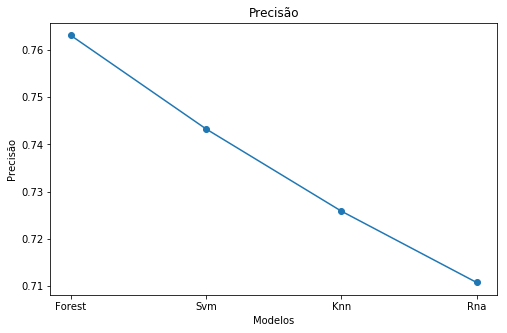

In [52]:
# Visualização Grafica das Precisoes
view_accuracy()

In [53]:
average_result

,Forest,Svm,Knn,Rna
0,0.763067,0.743267,0.725867,0.710767


Classificadores RandomForest e SVM tem obtido sempre os melhores resultados

### Criação dos Modelos Finais passíveis ser utilizados

In [4]:
# Cria os modelos que mostraram ter melhor precisão
def create_models():
    forest_model = RandomForestClassifier(n_estimators=85, random_state=1)
    forest_model.fit(previsores, classe)

    svm_model = SVC(kernel='rbf', C=2.0)
    svm_model.fit(previsores, classe)
    
    return forest_model, svm_model

In [13]:
# Cria os modelos de classificacao
classificadores = create_models()
list_models = ['modelo_forest', 'modelo_svm']

# Avaliação dos modelos carregados
precisoes = DataFrame(columns=list_models)
matrizes = {}
for i in range(len(classificadores)):
    precisoes[list_models[i]] = Series(classificadores[i].score(previsores, classe))
    
    _, matriz = avalia_modelo(list_models[i], classificadores[i], previsores, classe)
    matrizes[list_models[i]] = matriz

for key, val in matrizes.items():
    print("\n{}:\n {}".format(key, val))
    
precisoes


modelo_forest:
 [[700   0]
 [  0 300]]

modelo_svm:
 [[692   8]
 [ 93 207]]


,modelo_forest,modelo_svm
0,1.0,0.899


In [16]:
classificadores[0]

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=85, n_jobs=None,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

Adota-se o modelo de **RandomForest** com precisão de **76%**